<h2 style='color:blue' align='center'>Hollywood Face Recognition<h2>

In [18]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
from skimage.io import imread, imshow

<h3 style='color:purple'>1.1 Preprocessing: Detect face and eyes</h3>

#### When we look at any image, most of the time we identify a person using a face. An image might contain multiple faces, also the face can be obstructed and not clear. The first step in our pre-processing pipeline is to detect faces from an image. Once face is detected, we will detect eyes, if two eyes are detected then only we keep that image otherwise discard it.</h4>

#### Now how do you detect face and eyes?

We will use <strong>haar cascade</strong> from opencv for this. Here is an article on this: https://towardsdatascience.com/face-detection-in-2-minutes-using-opencv-python-90f89d7c0f81

(1200, 1000, 3)


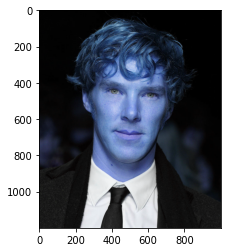

In [19]:
img = cv2.imread('./test_images/benedict_cumberbatch4.jpg')
print(img.shape)
plt.imshow(img)

(1200, 1000)
[[ 2  2  2 ...  0  0  0]
 [ 2  2  2 ...  0  0  0]
 [ 2  2  2 ...  0  0  0]
 ...
 [17 19 22 ... 33 36 38]
 [19 16 19 ... 35 38 39]
 [30 21 20 ... 36 37 39]]


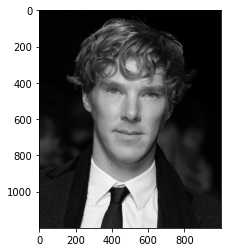

In [20]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print(gray_img.shape)
print(gray_img)
plt.imshow(gray_img, cmap='gray')

In [21]:
# Detecting the faces exist in image
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
print(faces)

(x,y,w,h), (x2, y2, w2, h2) = faces
x,y,w,h

[[251 265 514 514]]


ValueError: not enough values to unpack (expected 2, got 1)

In [ ]:
# Drawing a red rectangle around the face (in the original image, not the gray one) using opencv
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
face_img = cv2.rectangle(img,(x2,y2),(x2+w2,y2+h2),(255,0,0),2)
plt.imshow(face_img)
# Now, we have the face clearly detected..

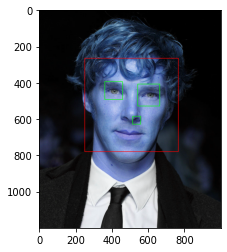

In [22]:
# Detecting the eyes (by drawing a green rectangle around them) of each face detected in the image (if there are multiple faces)
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray_img[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

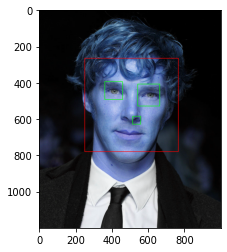

In [23]:
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
cv2.destroyAllWindows()
roi_color = []
i = 0
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray_img[y:y+h, x:x+w]
    roi_color.append(face_img[y:y+h, x:x+w])
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color[i],(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
    i += 1
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

<h3 style='color:purple'>1.2 Preprocessing: Crop the facial region of the image</h3>

(514, 514, 3)

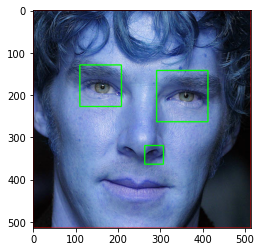

In [24]:
# roi_color is just the region of the face in the original image
plt.imshow(roi_color[0], cmap='gray')

# getting a cropped image of only the face (or faces)
cropped_img = np.array(roi_color[0])
cropped_img.shape

In [25]:
plt.imshow(roi_color[1], cmap='gray')

# getting a cropped image of only the face (or faces)
cropped_img = np.array(roi_color[1])
cropped_img.shape

IndexError: list index out of range

<h3 style='color:purple'>1.3 Preprocessing: Load image, detect face. If eyes >=2, then save and crop the face region</h3>

####  A function that can take input image and returns cropped image (if face and eyes >=2 are detected)

In [26]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray_img, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray_img[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

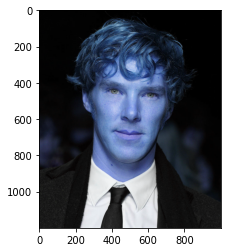

In [27]:
original_image = cv2.imread('./test_images/benedict_cumberbatch4.jpg')
plt.imshow(original_image)

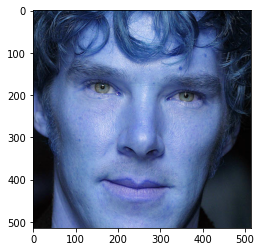

In [28]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/benedict_cumberbatch4.jpg')
plt.imshow(cropped_image)

**In below image face is not very clear and it doesn't have two eyes clearly visible**

In [29]:
org_img_obs = cv2.imread('./test_images/benedict_cumberbatch2.jpg')
plt.figure()
plt.show(imshow(org_image_obstructed))

gray_img_obs = cv2.cvtColor(org_img_obs, cv2.COLOR_BGR2GRAY)
plt.show(imshow(gray_img_obs, cmap='gray'))

NameError: name 'org_image_obstructed' is not defined

<Figure size 432x288 with 0 Axes>

In [30]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')

faces = face_cascade.detectMultiScale(gray_img_obs, 1.3, 5)
print(faces)

(x,y,w,h) = faces[0]
x,y,w,h

NameError: name 'gray_img_obs' is not defined

NameError: name 'gray_img_obs' is not defined

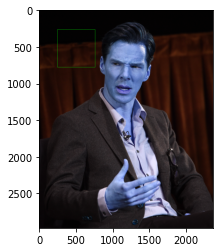

In [31]:
face_img = cv2.rectangle(org_img_obs,(x,y),(x+w,y+h),(0, 255, 0), 2)
plt.imshow(face_img)

eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(org_img_obs,(x,y),(x+w,y+h),(0, 255 ,0), 2)
    roi_gray = gray_img_obs[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255, 0, 0), 2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

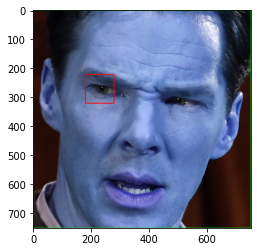

In [88]:
# cropped image (face only)
plt.imshow(roi_color, cmap='gray')

In [32]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/benedict_cumberbatch2.jpg')
print(cropped_image_no_2_eyes)

None


**Above cropped_image_no_2_eyes is None which means we should ignore this image and we will not use such image for model training**

In [33]:
# Generating a _cropped folder for images of faces only
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/_cropped/"

In [34]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

img_dirs

['./dataset/al_pacino',
 './dataset/benedict_cumberbatch',
 './dataset/emma_stone',
 './dataset/keanu_reeves',
 './dataset/michelle_williams',
 './dataset/morgan_freeman',
 './dataset/robert_downey_jr',
 './dataset/tom_hardy',
 './dataset/viola_davis',
 './dataset/will_smith',
 './dataset/_cropped']

**Go through all images in dataset folder and create cropped images for them. There will be cropped folder inside dataset folder after you run this code**

In [35]:
# Create the _cropped folder
# Don't run this again!!
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [36]:
# 
cropped_image_dirs = []
actor_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    actor_name = img_dir.split('/')[-1]
    actor_file_names_dict[actor_name] = []
    for entry in os.scandir(img_dir):
        # print(entry)
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + actor_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ", cropped_folder)
            cropped_file_name = actor_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            # This is needed later
            actor_file_names_dict[actor_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./dataset/_cropped/al_pacino
Generating cropped images in folder:  ./dataset/_cropped/benedict_cumberbatch
Generating cropped images in folder:  ./dataset/_cropped/emma_stone
Generating cropped images in folder:  ./dataset/_cropped/keanu_reeves
Generating cropped images in folder:  ./dataset/_cropped/michelle_williams
Generating cropped images in folder:  ./dataset/_cropped/morgan_freeman
Generating cropped images in folder:  ./dataset/_cropped/robert_downey_jr
Generating cropped images in folder:  ./dataset/_cropped/tom_hardy
Generating cropped images in folder:  ./dataset/_cropped/viola_davis
Generating cropped images in folder:  ./dataset/_cropped/will_smith


error: OpenCV(3.4.3) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


### Now we should have cropped folder under datasets folder that contains cropped images

### Manually examine cropped folder and delete any unwanted images

In [38]:
# The dictionary created before in the cropping process
actor_file_names_dict = {}
for img_dir in cropped_image_dirs:
    actor_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    actor_file_names_dict[actor_name] = file_list
actor_file_names_dict

{'al_pacino': ['./dataset/_cropped/al_pacino\\al_pacino1.png',
  './dataset/_cropped/al_pacino\\al_pacino10.png',
  './dataset/_cropped/al_pacino\\al_pacino103.png',
  './dataset/_cropped/al_pacino\\al_pacino105.png',
  './dataset/_cropped/al_pacino\\al_pacino106.png',
  './dataset/_cropped/al_pacino\\al_pacino107.png',
  './dataset/_cropped/al_pacino\\al_pacino109.png',
  './dataset/_cropped/al_pacino\\al_pacino116.png',
  './dataset/_cropped/al_pacino\\al_pacino118.png',
  './dataset/_cropped/al_pacino\\al_pacino119.png',
  './dataset/_cropped/al_pacino\\al_pacino12.png',
  './dataset/_cropped/al_pacino\\al_pacino122.png',
  './dataset/_cropped/al_pacino\\al_pacino123.png',
  './dataset/_cropped/al_pacino\\al_pacino124.png',
  './dataset/_cropped/al_pacino\\al_pacino125.png',
  './dataset/_cropped/al_pacino\\al_pacino126.png',
  './dataset/_cropped/al_pacino\\al_pacino127.png',
  './dataset/_cropped/al_pacino\\al_pacino128.png',
  './dataset/_cropped/al_pacino\\al_pacino129.png',
  '

<h3 style='color:purple'>(2) Preprocessing: Use wavelet transform as a feature for traning our model</h3>

#### In wavelet transformed image, you can see edges clearly and that can give us clues on various facial features such as eyes, nose, lips etc

### 1.4 Preprocessing: Wavelet transform

In [45]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

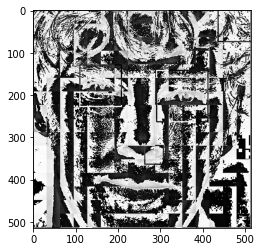

In [134]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

#### You can see above a wavelet transformed image that gives clues on facial features such as eyes, nose, lips etc. This along with raw pixel image can be used as an input for our classifier

### Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [43]:
# Express actor names as numbers from 0 to 9
class_dict = {}
count = 0
for actor_name in actor_file_names_dict.keys():
    class_dict[actor_name] = count
    count = count + 1
class_dict

{'al_pacino': 0,
 'benedict_cumberbatch': 1,
 'emma_stone': 2,
 'keanu_reeves': 3,
 'michelle_williams': 4,
 'morgan_freeman': 5,
 'robert_downey_jr': 6,
 'tom_hardy': 7,
 'viola_davis': 8,
 'will_smith': 9}

In [46]:
# Preparing X and y
X, y = [], []
for actor_name, training_files in actor_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[actor_name])

In [47]:
# which is 32*32*3 + 32*32
len(X[0])

4096

In [48]:
X[0]

array([[ 26],
       [ 71],
       [144],
       ...,
       [ 95],
       [  1],
       [  1]], dtype=uint8)

In [49]:
# "0" output means that this X is of class 0 (al_pacino)
y[0]

0

In [50]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(731, 4096)

### Data cleaning process is done. Now we are ready to train our model

## 2. Split dataset into Training and Test sets, and Training the model

We will use SVM with rbf kernel tuned  with heuristic finetuning

In [51]:
# Importing used modules
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# Trail and error parameters (kernel function, and c)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6870748299319728

In [53]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.50      0.38      0.43        16
           1       0.52      0.86      0.65        14
           2       0.92      0.79      0.85        14
           3       0.80      0.71      0.75        17
           4       0.62      0.50      0.56        10
           5       0.86      0.60      0.71        10
           6       0.57      0.65      0.60        20
           7       0.82      0.78      0.80        23
           8       0.79      0.79      0.79        14
           9       0.64      0.78      0.70         9

    accuracy                           0.69       147
   macro avg       0.70      0.68      0.68       147
weighted avg       0.70      0.69      0.69       147



### Using GridSearch to try out different models with different paramets. Goal is to come up with best modle with best fine tuned parameters

In [54]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [183]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [184]:
# Trying every model in the dictionary above
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.726113,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.445476,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.748394,{'logisticregression__C': 1}


In [185]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [186]:
best_estimators['svm'].score(X_test,y_test)

0.7346938775510204

In [187]:
best_estimators['random_forest'].score(X_test,y_test)

0.4965986394557823

In [188]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.7687074829931972

In [189]:
best_clf = best_estimators['svm']

In [190]:
# Deploying the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[10,  1,  1,  1,  0,  0,  1,  1,  0,  1],
       [ 0, 12,  0,  0,  0,  0,  1,  1,  0,  0],
       [ 0,  1, 10,  0,  2,  0,  1,  0,  0,  0],
       [ 0,  0,  1, 13,  1,  1,  0,  0,  1,  0],
       [ 1,  1,  0,  0,  7,  0,  0,  1,  0,  0],
       [ 0,  1,  0,  1,  0,  5,  2,  0,  0,  1],
       [ 1,  0,  0,  0,  1,  1, 15,  1,  0,  1],
       [ 0,  1,  0,  0,  1,  0,  2, 18,  1,  0],
       [ 2,  0,  0,  0,  0,  0,  1,  0, 11,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1,  7]], dtype=int64)

Text(69.0, 0.5, 'Truth')

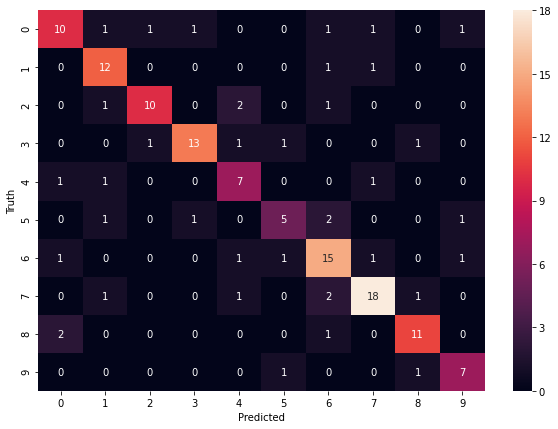

In [191]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [116]:
class_dict

{'al_pacino': 0,
 'benedict_cumberbatch': 1,
 'emma_stone': 2,
 'keanu_reeves': 3,
 'michelle_williams': 4,
 'morgan_freeman': 5,
 'robert_downey_jr': 6,
 'tom_hardy': 7,
 'viola_davis': 8,
 'will_smith': 9}

### Save the trained model

In [117]:
import joblib 
# Save the model as a pickle file for backend flask server
joblib.dump(best_clf, 'C:/Users/moham/Jupyter Directory/hollywood_face_recognition/server/artifacts/saved_model.pkl') 

['C:/Users/moham/Jupyter Directory/hollywood_face_recognition/server/artifacts/saved_model.pkl']

### Save class dictionary

In [118]:
import json
# Saving the class dictionary in a json file (needed in web application)
with open("C:/Users/moham/Jupyter Directory/hollywood_face_recognition/server/artifacts/class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

# Trail and error parameters (kernel function, and c)
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.6870748299319728

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
c = [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
scores = []
for i in c:
    pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = i))])
    pipe.fit(X_train, y_train)
    scores.append(pipe.score(X_test, y_test))

In [63]:
scores

[0.09523809523809523,
 0.09523809523809523,
 0.6462585034013606,
 0.6870748299319728,
 0.6870748299319728,
 0.6870748299319728,
 0.6870748299319728,
 0.6870748299319728]

In [65]:
from math import log
_c = []
for i in range(len(c)):
    _c.append(log(c[i]))

Text(0.5, 1.0, 'SVM')

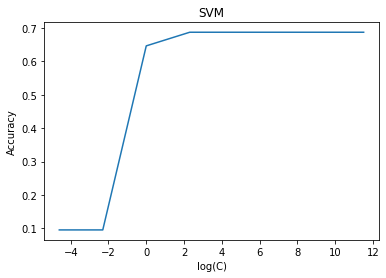

In [67]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(_c, scores)  # Plot some data on the axes.
ax.set_xlabel("log(C)")
ax.set_ylabel("Accuracy")
ax.set_title("SVM")

In [68]:
# model_params = {
#     'svm': {
#         'model': svm.SVC(gamma='auto',probability=True),
#         'params' : {
#             'svc__C': [1,10,100,1000],
#             'svc__kernel': ['rbf','linear']
#         }  
#     },
#     'random_forest': {
#         'model': RandomForestClassifier(),
#         'params' : {
#             'randomforestclassifier__n_estimators': [1,5,10]
#         }
#     },
#     'logistic_regression' : {
#         'model': LogisticRegression(solver='liblinear',multi_class='auto'),
#         'params': {
#             'logisticregression__C': [1,5,10]
#         }
#     }
# }

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
c2 = [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
scores2 = []
for i in c2:
    pipe = Pipeline([('scaler', StandardScaler()), ('logisticregression', LogisticRegression(solver='liblinear',multi_class='auto', C = i))])
    pipe.fit(X_train, y_train)
    scores2.append(pipe.score(X_test, y_test))

In [71]:
scores2

[0.7687074829931972,
 0.7755102040816326,
 0.7687074829931972,
 0.7687074829931972,
 0.7619047619047619,
 0.7482993197278912,
 0.7687074829931972,
 0.7551020408163265]

In [72]:
from math import log
_c2 = []
for i in range(len(c2)):
    _c2.append(log(c2[i]))

In [73]:
_c2

[-4.605170185988091,
 -2.3025850929940455,
 0.0,
 2.302585092994046,
 4.605170185988092,
 6.907755278982137,
 9.210340371976184,
 11.512925464970229]

Text(0.5, 1.0, 'Logistic Regression')

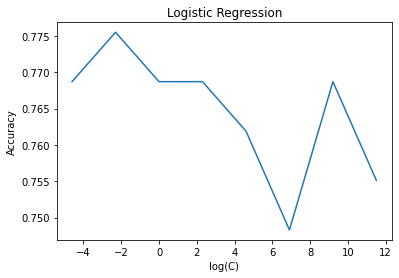

In [75]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(_c2, scores2)  # Plot some data on the axes.
ax.set_xlabel("log(C)")
ax.set_ylabel("Accuracy")
ax.set_title("Logistic Regression")

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)
c = [0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]
scores = []
for i in c:
    pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = i))])
    pipe.fit(X_train, y_train)
    scores.append(pipe.score(X_test, y_test))